# Model Capacity

Investigating model capacity on a multi-class classification problem.

In [16]:
from sklearn.datasets import make_circles
from sklearn.datasets import make_blobs
from sklearn.model_selection import train_test_split

from keras.models import Sequential
from keras.layers import Dense
from keras.utils import to_categorical
from keras.optimizers import SGD


import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
plt.style.use('fivethirtyeight')

import numpy as np
import pandas as pd

import warnings
warnings.filterwarnings('ignore')

In [17]:
#gen 2d dataset
X,y = make_blobs(n_samples=1000,centers=3,n_features=2,cluster_std=2,random_state=2)

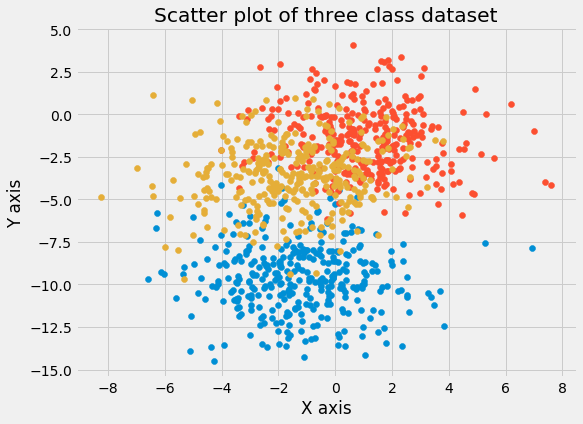

In [18]:
fig,ax = plt.subplots(figsize=(8,6))

#y contains class label,X is 2d points
for class_val in range(3):
    row_ix = np.where(y==class_val)
    ax.scatter(X[row_ix,0],X[row_ix,1])
ax.set_xlabel("X axis")
ax.set_ylabel("Y axis")
ax.set_title("Scatter plot of three class dataset");    

Standard deviation of 2 (cluster_std settings) means the points not linearily seperable, problem is non-trivial and neural network will try to find many good enough candidate solutions.

Make more complex dataset with 100 features and 20 classes

In [19]:
#100 features and 20 classes
X,y = make_blobs(n_samples=1000,centers=20,n_features=100,cluster_std=2,random_state=2)

## Change Model Capacity with Nodes
Increase number of nodes in single hidden layer.  Keep number of layers constant

In [20]:
#Now have 20 classes
print("class labels are {}".format(np.unique(y)))

class labels are [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19]


In [21]:
#one hot encode the target with keras
y = to_categorical(y)
y.shape

(1000, 20)

In [22]:
#split into train,test sets
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.5,random_state=2)
print("X_train has {} cols and {} rows".format(X_train.shape[0],X_train.shape[1]))
print("X_test has {} cols and {} rows".format(X_test.shape[0],X_test.shape[1]))
print("y_train has {} cols and {} rows".format(y_train.shape[0],y_train.shape[1]))
print("y_test has {} cols and {} rows".format(y_test.shape[0],y_test.shape[1]))

X_train has 500 cols and 100 rows
X_test has 500 cols and 100 rows
y_train has 500 cols and 20 rows
y_test has 500 cols and 20 rows


Create a function to train, fit and evaluate the model

In [23]:
#create a function to train, fit and evaluate the model
def evaluate_model(n_nodes,X_train,X_test,y_train,y_test):
    
    #get number of input features and classes
    n_input,n_classes = X_train.shape[1],y_test.shape[1]
    
    #define model
    model = Sequential()
    model.add(Dense(n_nodes,input_dim=n_input,activation='relu',kernel_initializer='he_uniform'))
    model.add(Dense(n_classes,activation='softmax'))    
    
    #compile model
    opt = SGD(lr=0.01,momentum=0.9)
    model.compile(loss='categorical_crossentropy',optimizer = opt,metrics=['accuracy'])
    
    #fit on training set
    history = model.fit(X_train,y_train,epochs=100,verbose=0)
    #evaluate on test set
    _,test_acc = model.evaluate(X_test,y_test,verbose=0)
    
    return history,test_acc

Call this function with different numbers of nodes to use in the hidden layer. Expect
that increasing the number of nodes would increase the capacity of the
model and allow the model to better learn the training dataset, at least to a point limited by
the chosen configuration for the learning algorithm (e.g. learning rate, batch size, and epochs).
The test accuracy for each configuration will be printed and the learning curves of training
accuracy with each configuration will be plotted

Number of nodes = 1: Test accuracy 0.148
Number of nodes = 2: Test accuracy 0.394
Number of nodes = 3: Test accuracy 0.630
Number of nodes = 4: Test accuracy 0.780
Number of nodes = 5: Test accuracy 0.898
Number of nodes = 6: Test accuracy 0.886
Number of nodes = 7: Test accuracy 1.000


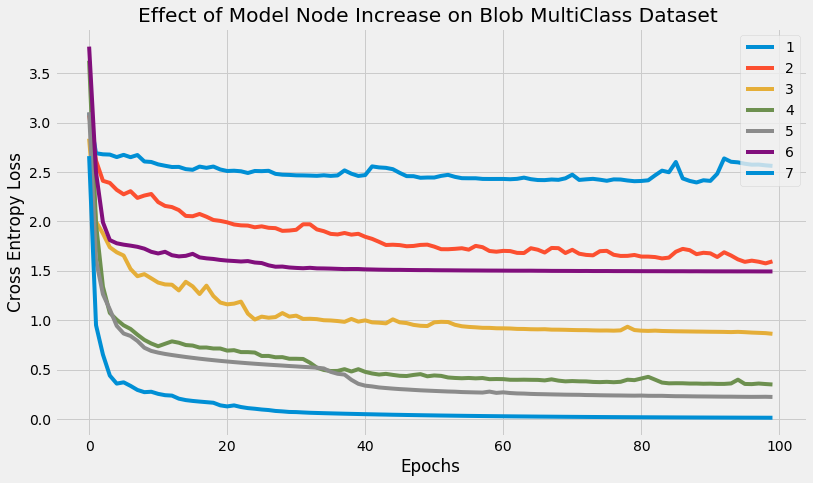

In [24]:
fig,ax = plt.subplots(figsize=(12,7))

num_nodes = list(range(1,8))
for n_nodes in num_nodes:
    #evalute model with given no of nodes
    history,result = evaluate_model(n_nodes,X_train,X_test,y_train,y_test)
    
    #summarize test accuracy
    print("Number of nodes = {}: Test accuracy {:.3f}".format(n_nodes,result))
    
    ax.plot(history.history['loss'],label=str(n_nodes))
    
ax.legend()
ax.set_xlabel("Epochs")
ax.set_ylabel("Cross Entropy Loss")
ax.set_title("Effect of Model Node Increase on Blob MultiClass Dataset ");   

As the number of nodes is increased, the capacity of the model
to learn the problem is increased. This results in a progressive lowering of the generalization
error of the model on the test dataset until 6 and 7 nodes when the model learns the problem
perfectly.

Line plot shows cross-entropy loss on the training dataset for each model
configuration (1 to 7 nodes in the hidden layer) over the 100 training epochs. We can see that as the number of nodes is increased, the model is able to better decrease the loss, e.g. to better
learn the training dataset. This plot shows the direct relationship between model capacity, as
defined by the number of nodes in the hidden layer and the model’s ability to learn.

## Change Model Capacity with Nodes

Evaluate how the number of layers impacts the ability
of the model to learn the mapping function.

A model with one hidden layer of 10 nodes is not equivalent to a model
with two hidden layers with five nodes each. The latter has a much greater capacity. The danger
is that a model with more capacity than is required is likely to overfit the training data, and as
with a model that has too many nodes, a model with too many layers will likely be unable to
learn the training dataset, getting lost or stuck during the optimization process.

Update *evaluate_model()* to fit a MLP with 10 nodes but increase the number of layers 

In [25]:
#create a function to train, fit and evaluate the model with given number of layers, no. nodes fixed at 10
def evaluate_model(n_layers,X_train,X_test,y_train,y_test,n_nodes=10):
    
    #get number of input features and classes
    n_input,n_classes = X_train.shape[1],y_test.shape[1]
    
    #define model
    model = Sequential()
    model.add(Dense(n_nodes,input_dim=n_input,activation='relu',kernel_initializer='he_uniform'))
    for _ in range(1,n_layers):
        model.add(Dense(10,activation='relu',kernel_initializer='he_uniform'))
    model.add(Dense(n_classes,activation='softmax'))
    
    #compile model
    opt = SGD(lr=0.01,momentum=0.9)
    model.compile(loss='categorical_crossentropy',optimizer = opt,metrics=['accuracy'])
    
    #fit on training set
    history = model.fit(X_train,y_train,epochs=100,verbose=0)
    #evaluate on test set
    _,test_acc = model.evaluate(X_test,y_test,verbose=0)
    
    return history,test_acc

Single hidden layer model has enough capacity to learn this problem, we will
explore increasing the number of layers to the point where the learning algorithm becomes
unstable and can no longer learn the problem.In this case, we will evaluate the model with 1 to 5 layers, with
the expectation that at some point, the number of layers will result in a model that the chosen
learning algorithm is unable to adapt to the training data.

Number of layers = 1: Test accuracy 1.000
Number of layers = 2: Test accuracy 1.000
Number of layers = 3: Test accuracy 0.884
Number of layers = 4: Test accuracy 0.934
Number of layers = 5: Test accuracy 0.926


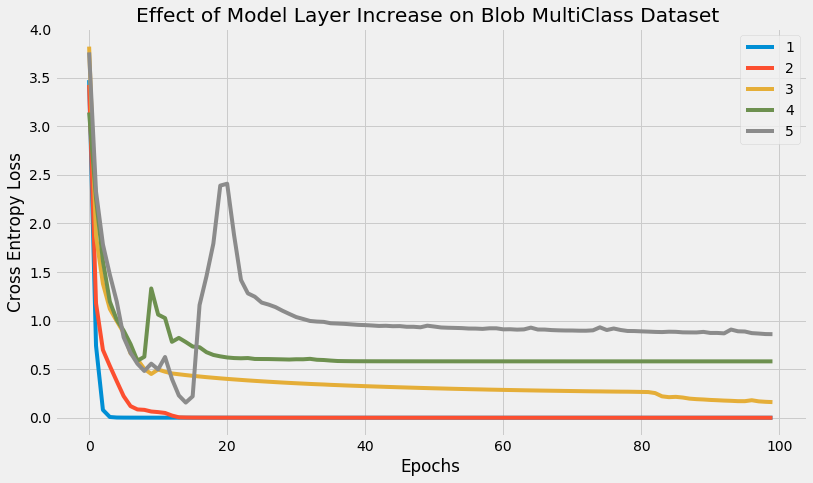

In [26]:
fig,ax = plt.subplots(figsize=(12,7))

num_layers = list(range(1,6))
for n_layers in num_layers:
    #evalute model with given no of nodes
    history,result = evaluate_model(n_layers,X_train,X_test,y_train,y_test)
    
    #summarize test accuracy
    print("Number of layers = {}: Test accuracy {:.3f}".format(n_layers,result))
    
    ax.plot(history.history['loss'],label=str(n_layers))
    
ax.legend()
ax.set_xlabel("Epochs")
ax.set_ylabel("Cross Entropy Loss")
ax.set_title("Effect of Model Layer Increase on Blob MultiClass Dataset "); 

The model is capable of learning the problem well with up to
four layers, then begins to falter. 
From the line plot five layers shows signs of initally doing well, then leaping up, suggests stuck on sub-optimal weights rather than overfitting the training dataset